In [3]:
import sys
import os
import subprocess

sys.path.append('..')

import collections
import numpy as np
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
from tqdm import tqdm

import tool.acqconv

Welcome to JupyROOT 6.10/00


In [4]:
con = pg.connect("dbname=eusospb_data user=eusospb password=1e20eVjemeuso host=localhost")
cur = con.cursor()

In [5]:
cur.execute("SELECT COUNT(*) FROM spb_processing_event_ver2  WHERE meta=1 OR meta IS NULL AND source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%'")
flight_num_entries = cur.fetchone()[0]
flight_num_entries

271615

In [6]:
cur.execute("SELECT * FROM spb_processing_event_ver2  WHERE meta=1 OR meta IS NULL AND source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%' OFFSET 0 LIMIT 1")
all_columns = list(map(lambda x: x[0], cur.description))
all_columns

['event_id',
 'config_info_id',
 'run_timestamp',
 'program_version',
 'source_file_acquisition',
 'source_file_trigger',
 'source_file_acquisition_full',
 'source_file_trigger_full',
 'global_gtu',
 'packet_id',
 'gtu_in_packet',
 'num_gtu',
 'num_triggered_pixels',
 'max_trg_box_per_gtu',
 'sum_trg_box_per_gtu',
 'avg_trg_box_per_gtu',
 'max_trg_pmt_per_gtu',
 'sum_trg_pmt_per_gtu',
 'avg_trg_pmt_per_gtu',
 'max_trg_ec_per_gtu',
 'sum_trg_ec_per_gtu',
 'avg_trg_ec_per_gtu',
 'max_n_persist',
 'sum_n_persist',
 'avg_n_persist',
 'max_sum_l1_pdm',
 'sum_sum_l1_pdm',
 'avg_sum_l1_pdm',
 'trigg_x_y_hough__dbscan_num_clusters_above_thr1',
 'trigg_x_y_hough__dbscan_num_clusters_above_thr2',
 'trigg_x_y_hough__max_peak_rho',
 'trigg_x_y_hough__max_peak_phi',
 'trigg_x_y_hough__peak_thr1_avg_rho',
 'trigg_x_y_hough__peak_thr1_avg_phi',
 'trigg_x_y_hough__peak_thr2_avg_rho',
 'trigg_x_y_hough__peak_thr2_avg_phi',
 'trigg_x_y_hough__peak_thr1_max_clu_rho',
 'trigg_x_y_hough__peak_thr1_max_clu_

In [26]:
def draw_distributions(columns, num_entries, query_format, con, num_at_once = 300000, num_rows = 300000):
    num_at_once = 300000
    max_rows = 300000
    num_figures = len(columns) #min(150, len(columns))
    #fig_ax_dict = collections.OrderedDict()

    cols_in_fig = min(num_figures,3)
    rows_in_fig = (num_figures//cols_in_fig)+int((num_figures % cols_in_fig) > 0)
    fig, axs = plt.subplots(rows_in_fig, cols_in_fig)
    fig.set_size_inches(cols_in_fig*34.28/5,rows_in_fig*60/20)

    axs_flattened = axs.reshape(-1)

    for i in range(0,1+num_entries//num_at_once):
        offset = num_at_once*i
        limit = num_at_once
        if offset > max_rows:
            break
        if offset + limit > max_rows:
            limit = max_rows - offset
#         q = "SELECT * FROM spb_processing_event_ver2 WHERE meta=1 OR meta IS NULL AND source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%'"\
#               " ORDER BY event_id OFFSET {offset} LIMIT {limit}".format(offset=offset, limit=limit)
        q = query_format.format(offset=offset, limit=limit)
        print(q)
        df = psql.read_sql(q,con)
        for col_i, col in enumerate(columns):
            if col_i >= num_figures:
                break
            print("hist", col_i, col)
            axs_flattened[col_i].set_title(col)
            axs_flattened[col_i].set_yscale('log')
            df[col].hist(ax=axs_flattened[col_i], bins=100)

        break # debugging

    return fig, axs    

In [ ]:
fig, axs = draw_distributions(all_columns[11:150+11], flight_num_entries, 
              "SELECT * FROM spb_processing_event_ver2 WHERE meta=1 OR meta IS NULL AND source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%' "\
              "ORDER BY event_id OFFSET {offset} LIMIT {limit}", con)

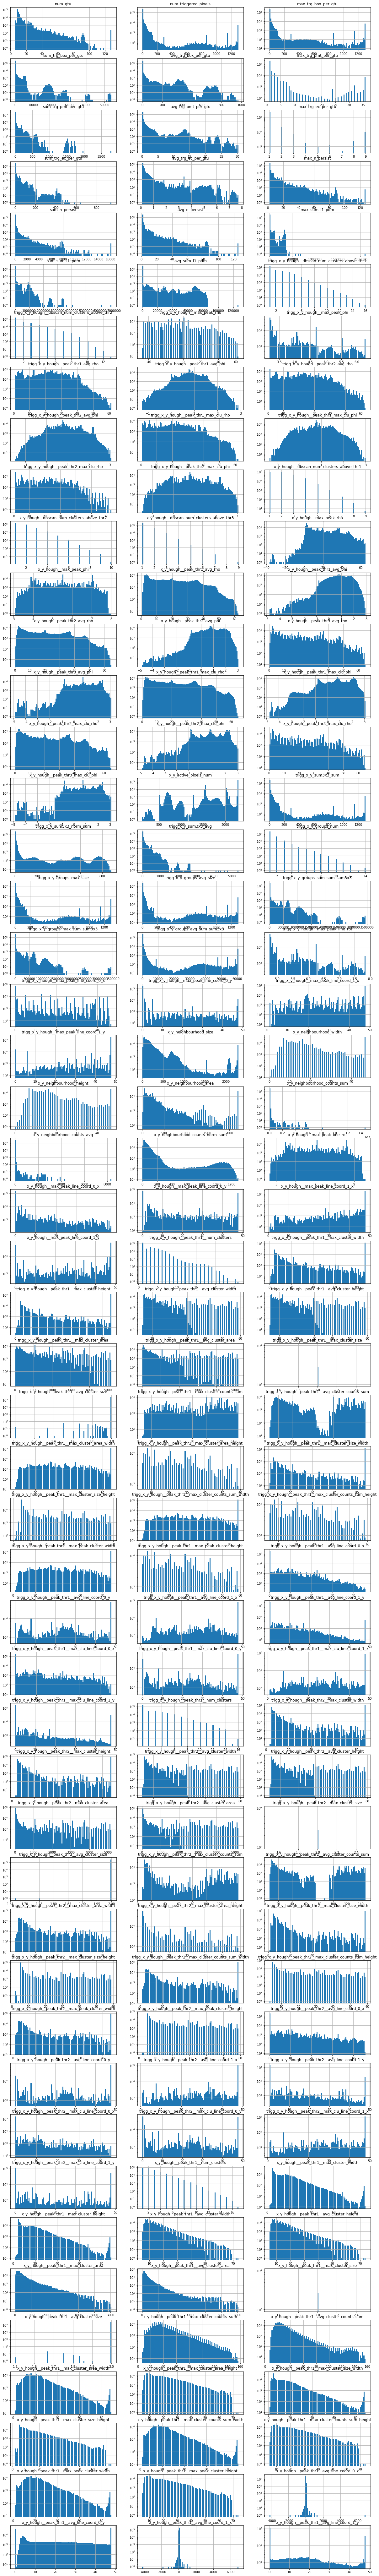

In [20]:
fig.savefig('flight_ver2_value_distributions_cols_11_150.png')
plt.show()

In [32]:
fig, axs = draw_distributions(all_columns[150+11:150*2+11], flight_num_entries, 
              "SELECT * FROM spb_processing_event_ver2 WHERE meta=1 OR meta IS NULL AND source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%' "\
              "ORDER BY event_id OFFSET {offset} LIMIT {limit}", con)

SELECT * FROM spb_processing_event_ver2 WHERE meta=1 OR meta IS NULL AND source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%' ORDER BY event_id OFFSET 0 LIMIT 300000
hist 0 x_y_hough__peak_thr1__max_clu_line_coord_0_x
hist 1 x_y_hough__peak_thr1__max_clu_line_coord_0_y
hist 2 x_y_hough__peak_thr1__max_clu_line_coord_1_x
hist 3 x_y_hough__peak_thr1__max_clu_line_coord_1_y
hist 4 x_y_hough__peak_thr2__num_clusters
hist 5 x_y_hough__peak_thr2__max_cluster_width
hist 6 x_y_hough__peak_thr2__max_cluster_height
hist 7 x_y_hough__peak_thr2__avg_cluster_width
hist 8 x_y_hough__peak_thr2__avg_cluster_height
hist 9 x_y_hough__peak_thr2__max_cluster_area
hist 10 x_y_hough__peak_thr2__avg_cluster_area
hist 11 x_y_hough__peak_thr2__max_cluster_size
hist 12 x_y_hough__peak_thr2__avg_cluster_size
hist 13 x_y_hough__peak_thr2__max_cluster_counts_sum
hist 14 x_y_hough__peak_thr2__avg_cluster_counts_sum
hist 15 x_y_hough__peak_thr2__max_cluster_area_width
hist 16 x_y_hough__peak_thr2__max

In [34]:
fig.savefig('flight_ver2_value_distributions_cols_161_311.png')
plt.show()

In [7]:
len(all_columns)

602

In [ ]:
fig, axs = draw_distributions(all_columns[150+11:150*2+11], flight_num_entries, 
              "SELECT * FROM spb_processing_event_ver2 WHERE meta=1 OR meta IS NULL AND source_file_acquisition LIKE 'allpackets-SPBEUSO-ACQUISITION-2017%' "\
              "ORDER BY event_id OFFSET {offset} LIMIT {limit}", con)